In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier  
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support, accuracy_score  
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from scipy.io import loadmat
import itertools
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
np.set_printoptions(threshold=np.nan)

pdata = pd.read_csv("../Data/preprocessed_final.csv")
# pdata = pdata.drop(["Unnamed: 0"], axis=1)
pdata
# pdata['Conditie'] = pdata['Conditie'].map({'norm': 0,  'bril': 1})
# pdata = pdata.drop(pdata[pdata["Conditie"] > 0].index)
# pdata = pdata.drop(pdata[pdata.Alcohol.eq(0)].sample(82).index)

pdata['Alcohol_Class'] = pdata['Alcohol'].astype(float)
conditions = [
    (pdata['Alcohol'] == 0),
    (pdata['Alcohol'] > 0) & (pdata['Alcohol'] < 1.5),
    (pdata['Alcohol'] > 1.5)]
choices = [0,1,2]
pdata['Alcohol_Class'] = np.select(conditions, choices, default=0)
pdata.groupby('Alcohol_Class').count()
# pdata
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     display(pdata)

,Conditie,SubjectID,Height,Weight,Age,BMI,Alcohol,Balance_MeanVelocity,GaitVelocity,MovementVelocity,std_SegmentData,mad_SegmentData,mean_StepLength,GaitTime
Alcohol_Class,,,,,,,,,,,,,,
0,180,180,180,180,180,180,180,180,180,180,180,180,180,180
1,120,120,120,120,120,120,120,120,120,120,120,120,120,120
2,8,8,8,8,8,8,8,8,8,8,8,8,8,8


In [2]:
X = pdata.drop(['Conditie', 'SubjectID', 'Alcohol_Class', 'Alcohol'], axis=1)
Y = pdata['Alcohol_Class']
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# feature extraction
model = LogisticRegression()
rfe = RFE(model, 2)
fit = rfe.fit(X, Y)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)
list(X)

Num Features: 2
Selected Features: [False False False False False  True False False False  True False]
Feature Ranking: [10  9  6  7  8  1  2  4  5  1  3]


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed

['Height',
 'Weight',
 'Age',
 'BMI',
 'Balance_MeanVelocity',
 'GaitVelocity',
 'MovementVelocity',
 'std_SegmentData',
 'mad_SegmentData',
 'mean_StepLength',
 'GaitTime']

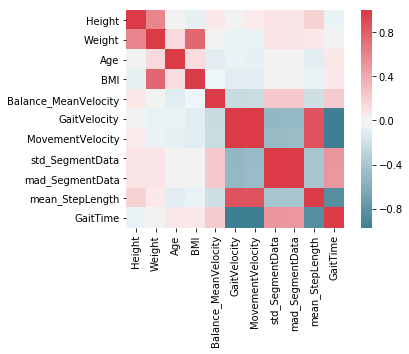

In [3]:
import seaborn as sns
corr = X.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True)

In [6]:
#Splits data into training and validation according to specified ratio
def validation_split(data, ratio):
    sidlist = data['SubjectID'].unique()
    gdata = [data[data['SubjectID']==sid] for sid in sidlist]
    np.random.shuffle(gdata)
    N = len(gdata)
    training = gdata[:int(ratio*N)]
    validation = gdata[(int(ratio*N)):]
    return training,validation

# Converts the arrays in a list to one flattend dataframe
def flatten(data, variable_list):
    return pd.DataFrame(np.vstack(data), columns=variable_list)

def get_split_data(originaldata, variable_list, ratio):
    data = originaldata[variable_list]
    training,validation = validation_split(data, 0.7)
    training = flatten(training, variable_list)
    validation = flatten(validation, variable_list)

    X_train = training.drop(['Alcohol_Class', 'SubjectID'], axis=1)
    y_train = training['Alcohol_Class']
    X_train = X_train.astype(float)
    y_train = y_train.astype(int)
    
    X_test = validation.drop(['Alcohol_Class', 'SubjectID'], axis=1)
    y_test = validation['Alcohol_Class']
    X_test = X_test.astype(float)
    y_test = y_test.astype(int)
    return X_train, X_test, y_train, y_test

collist =  ['SubjectID', 'Alcohol_Class', 'GaitVelocity', 'MovementVelocity']
X_train, X_test, y_train, y_test = get_split_data(pdata, collist , 0.7)


X_train = np.array(X_train, dtype=float)
y_train = np.array(y_train, dtype=int)

X_test = np.array(X_test, dtype=float)
y_test = np.array(y_test, dtype=int)



In [7]:
variable_list = ['SubjectID', 'Alcohol_Class', 'GaitVelocity', 'MovementVelocity', 'Velocity']

data = pdata[variable_list]
training,validation = validation_split(data, 0.7)
training = flatten(training, variable_list)
validation = flatten(validation, variable_list)

X_train = training.drop(['Alcohol_Class', 'SubjectID'], axis=1)
y_train = training['Alcohol_Class']
X_train = X_train.astype(float)
y_train = y_train.astype(int)

X_test = validation.drop(['Alcohol_Class', 'SubjectID'], axis=1)
y_test = validation['Alcohol_Class']
X_test = X_test.astype(float)
y_test = y_test.astype(int)

X_train = np.array(X_train, dtype=float)
y_train = np.array(y_train, dtype=int)

X_test = np.array(X_test, dtype=float)
y_test = np.array(y_test, dtype=int)


logreg = LogisticRegression(C=1e5, solver='lbfgs', multi_class='multinomial', random_state=100000, max_iter=1000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')


Accuracy of our model is equal 57.45 %.


In [8]:
variable_list = ['SubjectID', 'Alcohol_Class', 'GaitVelocity', 'MovementVelocity', 'Velocity']

def make_alcohol_decisions(originaldata, variable_list):
    data = originaldata[variable_list]
    training,validation = validation_split(data, 0.7)
    training = flatten(training, variable_list)
    validation = flatten(validation, variable_list)

    X_train = training.drop(['Alcohol_Class', 'SubjectID'], axis=1)
    y_train = training['Alcohol_Class']
    X_train = X_train.astype(float)
    y_train = y_train.astype(int)
    
    X_test = validation.drop(['Alcohol_Class', 'SubjectID'], axis=1)
    y_test = validation['Alcohol_Class']
    X_test = X_test.astype(float)
    y_test = y_test.astype(int)
    
#     scaler = StandardScaler()

#     # Fit on training set only.
#     scaler.fit(X_train)

#     # Apply transform to both the training set and the test set.
#     X_train = scaler.transform(X_train)
#     X_test = scaler.transform(X_test)
    
#     lda = LDA(n_components=1)  
#     X_train = lda.fit_transform(X_train, y_train)  
#     X_test = lda.transform(X_test) 
    
    logreg = LogisticRegression(C=1e5, solver='lbfgs', multi_class='multinomial', random_state=100000, max_iter=1000)
    logreg.fit(X_train, y_train)
    y_pred = logreg.predict(X_test)
    return accuracy_score(y_test, y_pred)


make_alcohol_decisions(pdata, variable_list)

0.48936170212765956

In [10]:
print('BMI, Age, mad_SegmentData:', np.mean([make_alcohol_decisions(pdata, ['SubjectID', 'Alcohol_Class', 'GaitVelocity', 'MovementVelocity', 'Velocity']) for i in range(100)]))
#print('BMI, Age, AverageStepLength:', np.mean([make_alcohol_decisions(adata, ['SubjectID', 'Alcohol', 'BMI', 'Age', 'AverageStepLength']) for i in range(100)]))
#print('Height, BMI, mad_SegmentData, AverageStepLength:', np.mean([make_alcohol_decisions(adata, ['SubjectID', 'Alcohol', 'Height', 'BMI', 'AverageStepLength', 'mad_SegmentData']) for i in range(100)]))
# print('BMI, mad_SegmentData, AverageStepLength:', np.mean([make_alcohol_decisions(adata, ['SubjectID', 'Alcohol', 'BMI', 'AverageStepLength', 'mad_SegmentData']) for i in range(100)]))
# print('Age, mad_SegmentData, AverageStepLength:', np.mean([make_alcohol_decisions(adata, ['SubjectID', 'Alcohol', 'Age', 'AverageStepLength', 'mad_SegmentData']) for i in range(100)]))
# print('mad_SegmentData, AverageStepLength:', np.mean([make_alcohol_decisions(adata, ['SubjectID', 'Alcohol', 'AverageStepLength', 'mad_SegmentData']) for i in range(100)]))
# print('mad_SegmentData, AverageStepLength:', np.mean([make_alcohol_decisions(normdata, ['SubjectID', 'Alcohol', 'AverageStepLength', 'mad_SegmentData']) for i in range(100)]))



BMI, Age, mad_SegmentData: 0.5448936170212766


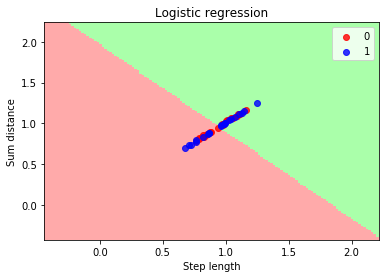

In [259]:
from sklearn import neighbors, datasets
from matplotlib.colors import ListedColormap
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])

h = .02  # step size in the mesh
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
colors = {0: 'red', 1: 'blue'}
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
# plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold)

score = logreg.score(X_test, y_test)
# plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, alpha=0.5, cmap=cmap_bold)

for label in np.unique(y_test):
    indices = np.where(y_test == label)
    plt.scatter(X_test[indices, 0], X_test[indices, 1], c=colors[label], alpha=0.8, 
                label=' {}'.format(label))

colors = ['red', 'blue']

labels = ['0', '1']
plt.legend(labels)
plt.title('Logistic regression')
plt.xlabel('Step length')
plt.ylabel('Sum distance')
plt.savefig('Logistic regression alcohol')
plt.show()